# Quadratic sorts

This file demonstrates data on the performance of various quadratic sorts. The following algorithms were tested:
- Bubble Sort
- Selection Sort
- Insertion Sort

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("results/quadratic_sorts.csv")
df = df.pivot(index="Sample Size", columns="Algorithm", values="Elapsed Time(ms)")
print(df.head(3))

Algorithm    Bubble  Insertion  Selection
Sample Size                              
1000              0          0          0
11000            78         11         16
21000           413         52         58


## All three sorts comparison

Here are the plots (in linear and logarithmic scales) of the recorded performance of all three sorting algorithms:

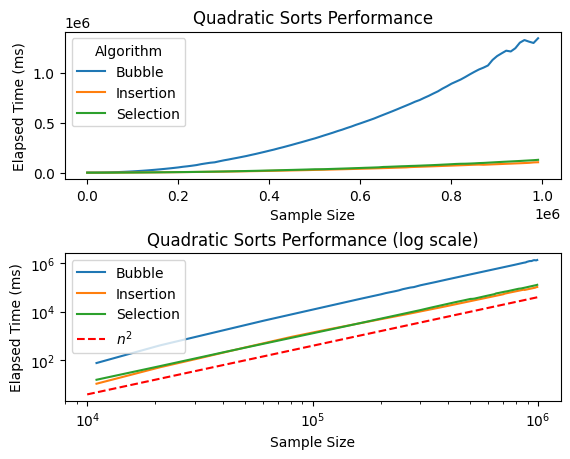

In [7]:
figure, axes = plt.subplots(nrows=2, ncols=1)
linear_scale, log_scale = axes
figure.subplots_adjust(hspace=0.5)
df.plot(
        ax=linear_scale,
        ylabel="Elapsed Time (ms)",
        title="Quadratic Sorts Performance")
df[df.values > 0].plot(
        ax=log_scale,
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Quadratic Sorts Performance (log scale)",
        legend=False)
x = np.linspace(10000, 1000000, 10)
log_scale.plot(x, (x/5000)**2, '--r', label='$n^2$')
log_scale.legend()

Logarithmic scale plot confirms that all three sorting algorithms have the same time complexity $O(n^2)$

Both plots indicate that the bubble sort algorithm is performing much worse than the insertion and selection sort algorithms. Logarithmic scale plot allows us to estimate that bubble sort is about 10 times slower than both insertion and selection sorts.

## Faster sorts

Previous plots showed little difference in performance between insertion and selection sorting algorithms. We will compare their performance separately.

<Axes: title={'center': 'Fast Quadratic Sorts Performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

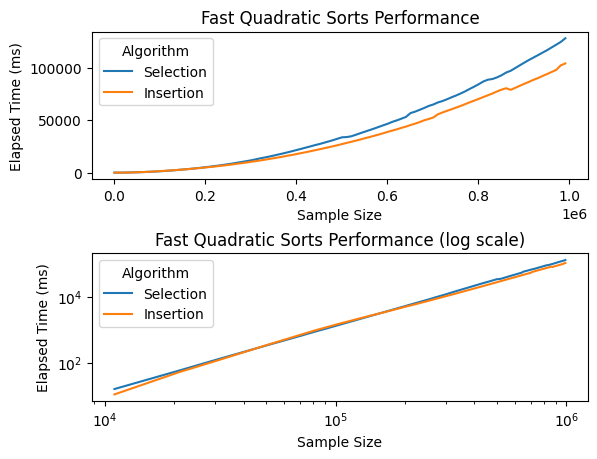

In [8]:
fast_quad = df[['Selection', 'Insertion']]
figure, axes = plt.subplots(nrows=2, ncols=1)
linear_scale, log_scale = axes
figure.subplots_adjust(hspace=0.5)
fast_quad.plot.line(
    ax=linear_scale,
    ylabel="Elapsed Time (ms)",
    title="Fast Quadratic Sorts Performance")
fast_quad[fast_quad.values > 0].plot(
        ax=log_scale,
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Fast Quadratic Sorts Performance (log scale)")

Selection sort tends to perform slightly better than the insertion sort algorithm with sample sizes greater than 400000. This is likely caused by the fact that insertion sort algorithm performs $O(n^2)$ writes to memory, while selection sorts performs only $O(n)$.